# Forecast of 10 Year Treasury Notes (1992-2021)

#### <font color='darkblue'>__1. Data and libaries import__</font> [(→ Link)](#data_import)
#### <font color='darkblue'>__2. Prediction with Regression models filter method__</font> [(→ Link)](#regression_fm)
##### <font color='black'>2.1 Create Train & Test set
##### <font color='black'>2.2 Linear Regression
2.2.1 Feature importance<br>
##### <font color='black'>2.3 Ridge
2.3.1 Feature importance<br>
##### <font color='black'>2.4 ElasticNet
2.4.1 Feature importance<br>
##### <font color='black'>2.5 Pipeline
#### <font color='darkblue'>__3. Prediction with Regression model all features__</font> [(→ Link)](#regression_all)
##### <font color='black'>3.1 Create Train & Test set
##### <font color='black'>3.2 LASSO Regression
3.2.1 Feature importance<br>
##### <font color='black'>3.3 Pipeline
#### <font color='darkblue'>__4. Classification data preperation__</font> [(→ Link)](#preparation)
#### <font color='darkblue'>__5. Classification models with all the features__</font> [(→ Link)](#classification)
##### <font color='black'>5.1 Random Forest
5.1.1 Feature importance<br>
##### <font color='black'>5.2 Neural Network
##### <font color='black'>5.3 XGBoost
5.3.1 Feature Importance<br>
##### <font color='black'>5.4 Pipeline
<br>

## <a id='data_import'></a>
## 1. Data and libaries import

In [1]:
# Loading libraries
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pmdarima as pm
import warnings  
import pydotplus
import pydot
import xgboost as xgb
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.neural_network import MLPClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNetCV
from matplotlib import rcParams
from matplotlib import pyplot
from functools import reduce
from IPython.display import Image  
from xgboost import XGBClassifier
warnings.filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
# Import data and create dataframe
df_forecast = pd.read_excel('Prediction_Data_1992-2021.xlsx', index_col=0)
df_forecast

,Yield of the ten-year Treasury Notes,Real Risk Premium,Inflation Risk Premium,National Activity Index,Consumer Sentiment,Labor Force Participation,Unemploymentrate,Borrowings from FED,Reserves Depository Institutions,M2,...,10-Year Expected Inflation,Velocity of M2,GDP,Real GDP,Federal Debt,quarterly_mean,half_year_mean,annual_mean,annual_quarterly_mean,annual_half_mean
Date,,,,,,,,,,,,,,,,,,,,,
1992-12-01,6.77,1.442349,0.546554,0.41,91.0,66.3,7.4,0.1236,56.6,3424.7,...,3.436406,1.964333,4.300000,9851.707667,4.212723e+06,0.984121,0.986706,1.035451,1.052158,1.049401
1993-01-01,6.60,1.363231,0.503369,0.22,89.3,66.2,7.3,0.1655,56.0,3419.1,...,3.329465,1.971000,2.900000,9857.185000,4.230580e+06,1.016288,1.006061,1.056692,1.039756,1.050326
1993-02-01,6.26,1.294959,0.464536,0.11,86.6,66.2,7.1,0.0453,53.9,3414.5,...,3.187282,1.975667,3.533333,9876.311667,4.271037e+06,1.058307,1.051917,1.099707,1.039119,1.045432
1993-03-01,5.98,1.234105,0.446984,-0.47,85.9,66.2,7.0,0.0915,54.3,3411.7,...,3.012067,1.980333,4.166667,9895.438333,4.311493e+06,1.070652,1.088907,1.129459,1.054926,1.037241
1993-04-01,5.97,1.243659,0.441624,0.21,85.6,66.1,7.1,0.0732,56.5,3411.3,...,3.060806,1.985000,4.800000,9914.565000,4.351950e+06,1.038945,1.073423,1.110274,1.068655,1.034330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-01,1.52,1.146639,0.334032,0.21,85.5,61.6,5.9,87.7460,3848.1,20458.9,...,1.596289,1.115667,10.066667,19442.032000,2.846242e+07,1.050987,0.957237,0.727522,0.692227,0.760023
2021-07-01,1.32,1.156082,0.353131,0.71,81.2,61.7,5.4,87.6211,3943.9,20620.0,...,1.624811,1.114000,8.400000,19478.893000,2.842892e+07,1.155303,1.132576,0.881944,0.763388,0.778707
2021-08-01,1.28,1.106154,0.386107,0.03,70.3,61.7,5.2,80.7667,4140.1,20852.3,...,1.580163,1.118000,10.433333,19588.025333,2.882502e+07,1.121094,1.170573,0.950521,0.847851,0.812013


## <a id='regression_fm'></a>
## 2. Prediction with Regression models filter method

### 2.1 Create Train & Test set

In [3]:
# Shift yield forward one month
pred = df_forecast['Yield of the ten-year Treasury Notes'].shift(1)
df_forecast = df_forecast.iloc[1: , :]

In [4]:
y = df_forecast['Yield of the ten-year Treasury Notes']
X = df_forecast[['Real Risk Premium',
                 'Labor Force Participation',
                 'Reserves Depository Institutions',  
                 'M2',
                 '1-Month Real Interest',
                 '1-Year Real Interest',
                 '10-Year Real Interest',
                 '1-Year Expected Inflation', 
                 '2-Year Expected Inflation', 
                 '3-Year Expected Inflation', 
                 '4-Year Expected Inflation',
                 '5-Year Expected Inflation',
                 '10-Year Expected Inflation',
                 'Velocity of M2',
                 'Real GDP',
                 'Federal Debt']]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

In [6]:
print('Number of training data:', len(X_train))
print('Number of test data:', len(X_test))

Number of training data: 276
Number of test data: 70


### 2.2 Linear Regression

In [7]:
# Create Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [8]:
print ("Training Set Score R^2: {:.2f}".format(lr.score(X_train, y_train)))
print ("Test Set Score R^2: {:.2f}".format(lr.score(X_test, y_test)))

Training Set Score R^2: 0.99
Test Set Score R^2: 0.79


#### 2.2.1 Feature importance

<AxesSubplot:ylabel='features'>

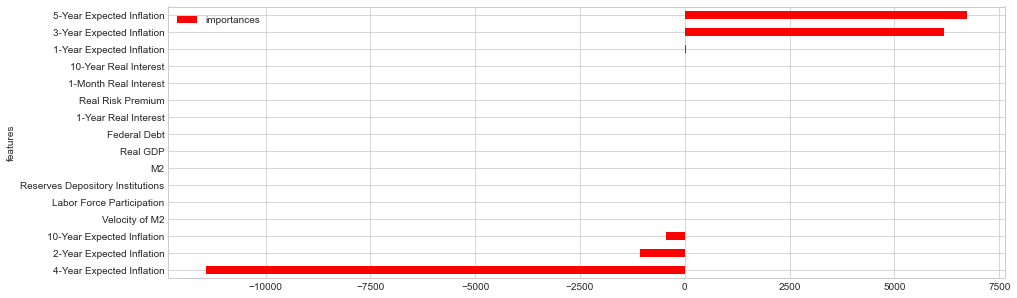

In [9]:
cols = X_train.columns

# Derive feature importance from Linear Regression
importances = lr.coef_
indices     = np.argsort(importances)[::-1]

# Barplot with feature importance
df = pd.DataFrame({'features':cols,'importances': importances})
df.sort_values('importances', inplace=True)
df.plot(kind='barh', y='importances', x='features', color='r', figsize=(15,5))

### 2.3 Ridge

In [10]:
# Create Ridge model
rr10 = Ridge(alpha=10)
rr10.fit(X_train, y_train)

Ridge(alpha=10)

In [11]:
print ("Training Set Score R^2: {:.2f}".format(rr10.score(X_train, y_train)))
print ("Test Set Score R^2: {:.2f}".format(rr10.score(X_test, y_test)))

Training Set Score R^2: 0.98
Test Set Score R^2: 0.83


#### 2.3.1 Feature importance

In [12]:
cols = X_train.columns

<AxesSubplot:ylabel='features'>

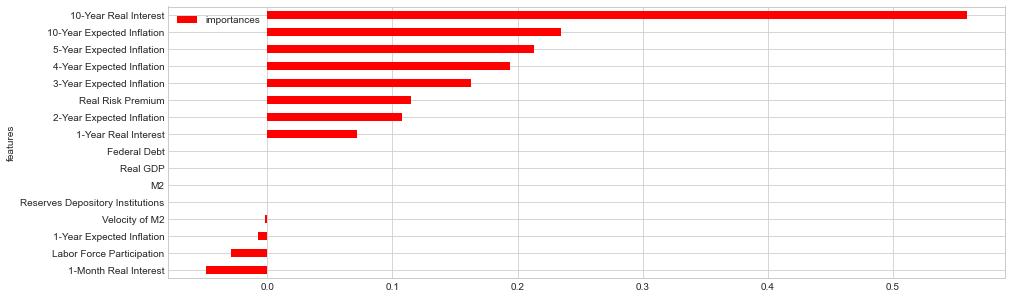

In [13]:
# Derive feature importance from Ridge with alpha 10
importances = rr10.coef_
indices     = np.argsort(importances)[::-1]

# Barplot with feature importance
df = pd.DataFrame({'features':cols,'importances': importances})
df.sort_values('importances', inplace=True)
df.plot(kind='barh', y='importances', x='features', color='r', figsize=(15,5))

### 2.3 Elastic Net

In [14]:
# Create Elastic Net model
encv = make_pipeline(StandardScaler(), ElasticNetCV())
encv.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('elasticnetcv', ElasticNetCV())])

In [15]:
print ("Training Set Score R^2: {:.2f}".format(encv.score(X_train, y_train)))
print ("Test Set Score R^2: {:.2f}".format(encv.score(X_test, y_test)))

Training Set Score R^2: 0.98
Test Set Score R^2: 0.84


#### 2.3.1 Feature importance

In [16]:
encv_cv_coef = encv[-1].coef_

<AxesSubplot:ylabel='features'>

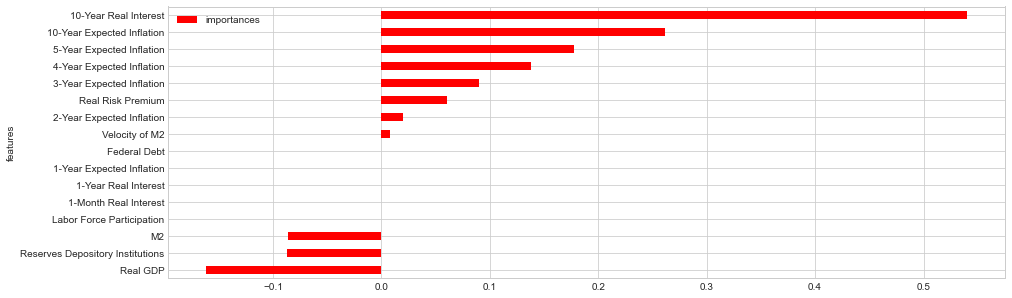

In [17]:
# Derive feature importance from Elastic Net
importances = encv_cv_coef
indices     = np.argsort(importances)[::-1]

# Barplot with feature importance
df = pd.DataFrame({'features':cols,'importances': importances})
df.sort_values('importances', inplace=True)
df.plot(kind='barh', y='importances', x='features', color='r', figsize=(15,5))

### 2.4 Pipeline

In [18]:
# Name of all the models
models = [
    ('Linear Regression', lr),
    ('Ridge, Alpha 10', rr10),
    ('ElasticNetCV', encv),]

In [19]:
for name, model in models:
    pipelined_model = Pipeline([ 
                                 (name, model)
                            ])
    
    # Train the model
    pipelined_model.fit(X_train, y_train)

    # Predict the model
    y_hat = pipelined_model.predict(X_test)

    # Calculate metrics
    MAE = mean_absolute_error(y_test, y_hat)
    MSE = mean_squared_error(y_test, y_hat, squared=True)
    RMSE = mean_squared_error(y_test, y_hat, squared=False)
    MAPE = mean_absolute_percentage_error(y_test, y_hat)
    R2_train = pipelined_model.score(X_train, y_train)
    R2_test = r2_score(y_test, y_hat)
    print('Model: ', name, ' | R2 Train: ', R2_train)
    print('Model: ', name, ' | R2 Test: ', R2_test)
    print('Model: ', name, ' | MAE: ', MAE)
    print('Model: ', name, ' | MSE: ', MSE)
    print('Model: ', name, ' | RMSE: ', RMSE)
    print('Model: ', name, ' | MAPE: ', MAPE)
    print('----------------')

Model:  Linear Regression  | R2 Train:  0.9872233667319595
Model:  Linear Regression  | R2 Test:  0.787287812581986
Model:  Linear Regression  | MAE:  0.23525512663898718
Model:  Linear Regression  | MSE:  0.10428703792092692
Model:  Linear Regression  | RMSE:  0.32293503668838247
Model:  Linear Regression  | MAPE:  0.14588312461886027
----------------
Model:  Ridge, Alpha 10  | R2 Train:  0.9824663630151337
Model:  Ridge, Alpha 10  | R2 Test:  0.833394889235428
Model:  Ridge, Alpha 10  | MAE:  0.22703244343357096
Model:  Ridge, Alpha 10  | MSE:  0.0816819840697747
Model:  Ridge, Alpha 10  | RMSE:  0.28580060194088935
Model:  Ridge, Alpha 10  | MAPE:  0.1636627142153466
----------------
Model:  ElasticNetCV  | R2 Train:  0.9832505149123097
Model:  ElasticNetCV  | R2 Test:  0.8445303293034958
Model:  ElasticNetCV  | MAE:  0.23397704483124596
Model:  ElasticNetCV  | MSE:  0.0762225786885368
Model:  ElasticNetCV  | RMSE:  0.27608436878703724
Model:  ElasticNetCV  | MAPE:  0.16003640248833

## <a id='regression_all'></a>
## 3. Prediction with Regression model all features

### 3.1 Create Train & Test set

In [20]:
y = df_forecast['Yield of the ten-year Treasury Notes']
X = df_forecast.drop('Yield of the ten-year Treasury Notes',1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

In [22]:
print('Number of training data:', len(X_train))
print('Number of test data:', len(X_test))

Number of training data: 276
Number of test data: 70


### 3.2 LASSO

In [23]:
# Create LASSO model
lasso = make_pipeline(StandardScaler(), LassoCV())
lasso.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('lassocv', LassoCV())])

In [24]:
print ("Training Set Score R^2: {:.2f}".format(lasso.score(X_train, y_train)))
print ("Test Set Score R^2: {:.2f}".format(lasso.score(X_test, y_test)))

Training Set Score R^2: 0.99
Test Set Score R^2: 0.82


In [25]:
print ("Training Set Score R^2: {:.2f}".format(lasso.score(X_train, y_train)))
print ("Test Set Score R^2: {:.2f}".format(lasso.score(X_test, y_test)))

Training Set Score R^2: 0.99
Test Set Score R^2: 0.82


#### 3.2.1 Feature importance

In [26]:
lasso_cv_coef = lasso[-1].coef_

In [27]:
cols = X_train.columns

<AxesSubplot:ylabel='features'>

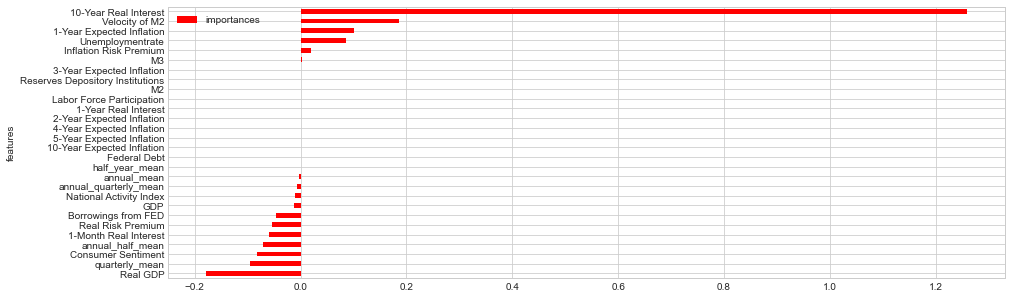

In [28]:
# Derive feature importance from LASSO
importances = lasso_cv_coef
indices     = np.argsort(importances)[::-1]

# Barplot with feature importance
df = pd.DataFrame({'features':cols,'importances': importances})
df.sort_values('importances', inplace=True)
df.plot(kind='barh', y='importances', x='features', color='r', figsize=(15,5))

### 3.3 Pipeline

In [29]:
# Name of all the models
models = [('LASSO',lasso)]

In [30]:
for name, model in models:
    pipelined_model = Pipeline([ 
                                 (name, model)
                            ])
    
    # Train the model
    pipelined_model.fit(X_train, y_train)

    # Predict the model
    y_hat = pipelined_model.predict(X_test)

    # Calculate metrics
    MAE = mean_absolute_error(y_test, y_hat)
    MSE = mean_squared_error(y_test, y_hat, squared=True)
    RMSE = mean_squared_error(y_test, y_hat, squared=False)
    MAPE = mean_absolute_percentage_error(y_test, y_hat)
    R2_train = pipelined_model.score(X_train, y_train)
    R2_test = r2_score(y_test, y_hat)
    print('Model: ', name, ' | R2 Train: ', R2_train)
    print('Model: ', name, ' | R2 Test: ', R2_test)
    print('Model: ', name, ' | MAE: ', MAE)
    print('Model: ', name, ' | MSE: ', MSE)
    print('Model: ', name, ' | RMSE: ', RMSE)
    print('Model: ', name, ' | MAPE: ', MAPE)
    print('----------------')

Model:  LASSO  | R2 Train:  0.9915808755264954
Model:  LASSO  | R2 Test:  0.8175897559487412
Model:  LASSO  | MAE:  0.201813559130836
Model:  LASSO  | MSE:  0.08943081385908477
Model:  LASSO  | RMSE:  0.29904985179579135
Model:  LASSO  | MAPE:  0.14288428730191058
----------------


## <a id='preparation'></a>
## 4 Classification data preperation

In [31]:
# Create dataframe
classification = df_forecast.copy()

In [32]:
# Rename the column
data = classification[["Yield of the ten-year Treasury Notes"]]
data = data.rename(columns = {'Yield of the ten-year Treasury Notes':'Yield'})

# Setup target variable.  This identifies if the price went up or down.
data["Target"] = classification.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Yield of the ten-year Treasury Notes"]

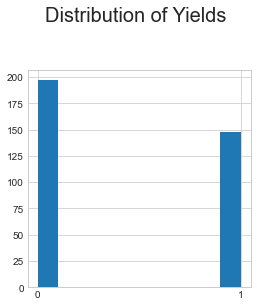

In [33]:
# Visualize the data
fig, ax = plt.subplots(figsize=(4, 4))
fig.suptitle('Distribution of Yields', fontsize=20, y=1.1, ha="center")
plt.hist(data.Target)
ax.xaxis.set_ticks([0,1]) 
plt.show()

In [34]:
# Create training data
x = classification.drop('Yield of the ten-year Treasury Notes',1)
predictors = x

In [35]:
# Merging both dataframes
forecast = [data, predictors]

forecast = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='outer'), forecast)

In [36]:
# Dropping first row because of NAN values
forecast = forecast.iloc[1: , :]

## <a id='classification'></a>
## 5 Classification models with all the features

### Definition of variables, train-test splitting

In [37]:
# Create predictors and target variables
predictors = forecast.drop(['Yield','Target'], axis=1)
target = forecast['Target']

In [38]:
# Split the dataframes into test and train
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.20, shuffle=False)

In [39]:
print('Number of training data:', len(X_train))
print('Number of test data:', len(X_test))

Number of training data: 276
Number of test data: 69


### 5.1 Random Forest

In [40]:
# Create Random Forest model 
rf100 = RandomForestClassifier(max_depth =100)
rf100.fit(X_train,y_train)

RandomForestClassifier(max_depth=100)

In [41]:
# Evaluate Random Forest
pred_train = rf100.predict(X_train)
pred_test = rf100.predict(X_test)

In [42]:
# Calculate metrics
print("Accuracy score Train:", np.round(accuracy_score(pred_train, y_train),4))
print("Accuracy score Test:", np.round(accuracy_score(pred_test, y_test),4))

print("Precision score Test:", np.round(precision_score(pred_test, y_test), 4))

print("Recall score Test:", np.round(recall_score(pred_test, y_test), 4))

print("F1 Score Test:", np.round(f1_score(pred_test, y_test),4))

Accuracy score Train: 1.0
Accuracy score Test: 0.7536
Precision score Test: 0.697
Recall score Test: 0.7667
F1 Score Test: 0.7302


[[29  7]
 [10 23]]


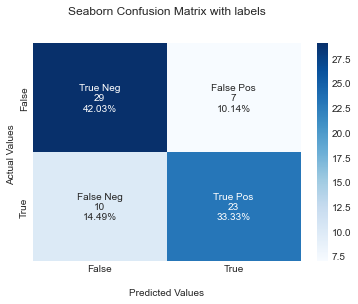

In [43]:
# Display the confusion matrix
cf_matrix = confusion_matrix(y_test, pred_test)
print(cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
plt.show()

0.7512626262626263


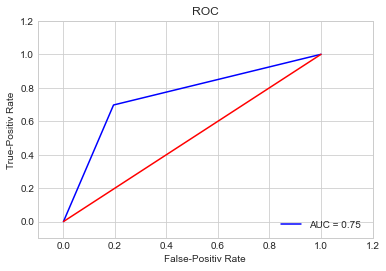

In [44]:
# Calculating the AUC and plotting the ROC curve
false_positive_rate , true_positive_rate , thresholds = roc_curve(y_test , pred_test)
roc_auc = auc(false_positive_rate , true_positive_rate) 
print(roc_auc)

#Show ROC
plt.title('ROC')
plt.plot(false_positive_rate ,true_positive_rate ,'b' , label='AUC = %0.2f '% roc_auc) 
plt.legend(loc='lower right') 
plt.plot([0 ,1] ,[0 ,1] , 'r') 
plt.xlim([ -0.1 ,1.2])
plt.ylim ([ -0.1 ,1.2])
plt.ylabel('True-Positiv Rate')
plt.xlabel('False-Positiv Rate')
#plt.savefig('roc2.png', dpi=500) 
plt.show()

#### 5.1.1 Feature importance

In [45]:
cols = X_train.columns

<AxesSubplot:ylabel='features'>

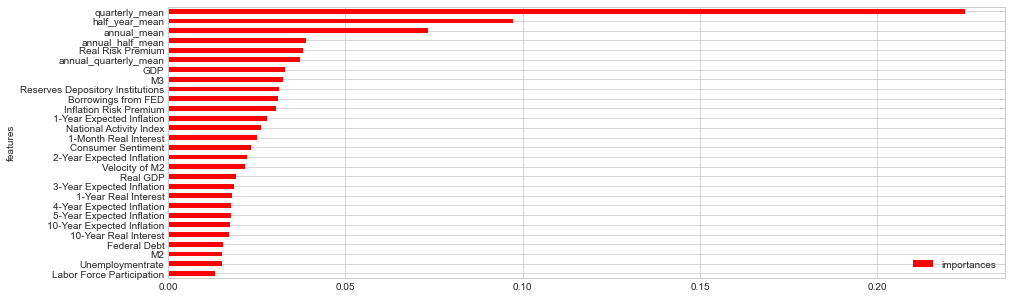

In [46]:
# Derive feature importance from Random Forest wit 100 trees
importances = rf100.feature_importances_
std         = np.std([tree.feature_importances_ for tree in rf100.estimators_], axis=0)
indices     = np.argsort(importances)[::-1]


# Barplot with feature importance
df = pd.DataFrame({'features':cols,'importances': importances})
df.sort_values('importances', inplace=True)
df.plot(kind='barh', y='importances', x='features', color='r', figsize=(15,5))

### 5.2 Neural Network

In [47]:
# Create Neural Network model
nn = make_pipeline(StandardScaler(), MLPClassifier()) 
nn.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier', MLPClassifier())])

In [48]:
# Evaluate Neural Network
pred_train = nn.predict(X_train)
pred_test = nn.predict(X_test)

In [49]:
# Calculate metrics
print("Accuracy score Train:", np.round(accuracy_score(pred_train, y_train),4))
print("Accuracy score Test:", np.round(accuracy_score(pred_test, y_test),4))

print("Precision score Test:", np.round(precision_score(pred_test, y_test), 4))

print("Recall score Test:", np.round(recall_score(pred_test, y_test), 4))

print("F1 Score Test:", np.round(f1_score(pred_test, y_test),4))

Accuracy score Train: 0.9058
Accuracy score Test: 0.7246
Precision score Test: 0.5455
Recall score Test: 0.8182
F1 Score Test: 0.6545


[[32  4]
 [15 18]]


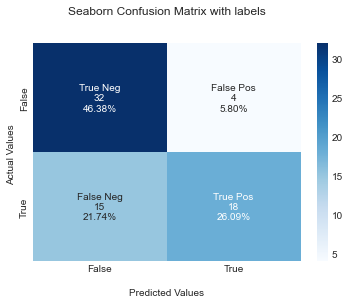

In [50]:
# Display the confusion matrix
cf_matrix = confusion_matrix(y_test, pred_test)
print(cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
plt.show()

0.7171717171717171


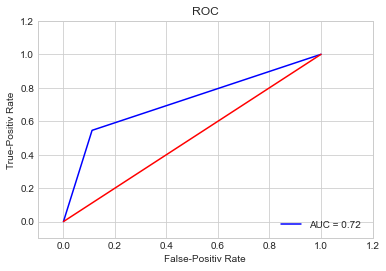

In [51]:
# Calculating the AUC and plotting the ROC curve
false_positive_rate , true_positive_rate , thresholds = roc_curve(y_test , pred_test)
roc_auc = auc(false_positive_rate , true_positive_rate) 
print(roc_auc)

#Show ROC
plt.title('ROC')
plt.plot(false_positive_rate ,true_positive_rate ,'b' , label='AUC = %0.2f '% roc_auc) 
plt.legend(loc='lower right') 
plt.plot([0 ,1] ,[0 ,1] , 'r') 
plt.xlim([ -0.1 ,1.2])
plt.ylim ([ -0.1 ,1.2])
plt.ylabel('True-Positiv Rate')
plt.xlabel('False-Positiv Rate')
#plt.savefig('roc2.png', dpi=500) 
plt.show()

### 5.3 XGBoost

In [52]:
# Create XGBoost model
XGB10 = xgb.XGBClassifier(n_estimators=10)
eval_set = [(X_train, y_train), (X_test, y_test)]

# Fit the classifier to the training set
XGB10.fit(X_train, y_train, eval_metric=["error"], eval_set=eval_set, verbose=True)
results = XGB10.evals_result()

[0]	validation_0-error:0.09058	validation_1-error:0.18841
[1]	validation_0-error:0.07609	validation_1-error:0.15942
[2]	validation_0-error:0.06522	validation_1-error:0.23188
[3]	validation_0-error:0.04710	validation_1-error:0.17391
[4]	validation_0-error:0.03986	validation_1-error:0.17391
[5]	validation_0-error:0.03261	validation_1-error:0.17391
[6]	validation_0-error:0.02536	validation_1-error:0.18841
[7]	validation_0-error:0.01812	validation_1-error:0.17391
[8]	validation_0-error:0.01812	validation_1-error:0.17391
[9]	validation_0-error:0.01087	validation_1-error:0.18841


In [53]:
# Evaluate XGBoost
pred_train = XGB10.predict(X_train)
pred_test = XGB10.predict(X_test)

In [54]:
# Calculate metrics
print("Accuracy score Train:", np.round(accuracy_score(pred_train, y_train),4))
print("Accuracy score Test:", np.round(accuracy_score(pred_test, y_test),4))

print("Precision score Test:", np.round(precision_score(pred_test, y_test), 4))

print("Recall score Test:", np.round(recall_score(pred_test, y_test), 4))

print("F1 Score Test:", np.round(f1_score(pred_test, y_test),4))

Accuracy score Train: 0.9891
Accuracy score Test: 0.8116
Precision score Test: 0.7576
Recall score Test: 0.8333
F1 Score Test: 0.7937


[[31  5]
 [ 8 25]]


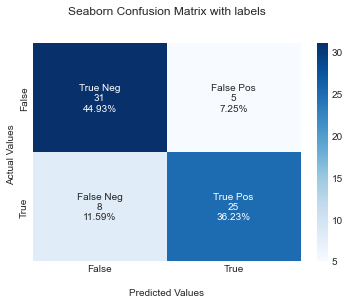

In [55]:
# Display the confusion matrix
cf_matrix = confusion_matrix(y_test, pred_test)
print(cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
plt.show()

0.8093434343434345


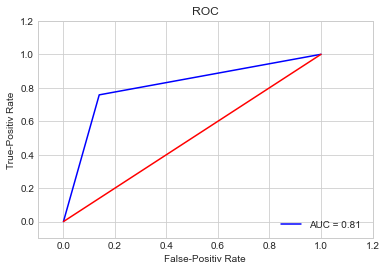

In [56]:
# Calculating the AUC and plotting the ROC curve
false_positive_rate , true_positive_rate , thresholds = roc_curve(y_test , pred_test)
roc_auc = auc(false_positive_rate , true_positive_rate) 
print(roc_auc)

#Show ROC
plt.title('ROC')
plt.plot(false_positive_rate ,true_positive_rate ,'b' , label='AUC = %0.2f '% roc_auc) 
plt.legend(loc='lower right') 
plt.plot([0 ,1] ,[0 ,1] , 'r') 
plt.xlim([ -0.1 ,1.2])
plt.ylim ([ -0.1 ,1.2])
plt.ylabel('True-Positiv Rate')
plt.xlabel('False-Positiv Rate')
#plt.savefig('roc2.png', dpi=500) 
plt.show()

#### 5.3.1 Feature importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

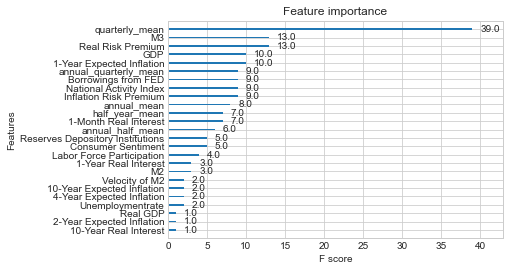

In [57]:
# Derive feature importance from XGBoost wit 10 boosting rounds
xgb.plot_importance(XGB10)

### 5.4 Pipeline

In [58]:
# Name of all the models
models = [
    ('Random Forest, trees = 100', rf100),
    ('Neural Network', nn),
    ('XGBoost, boosting rounds = 10', XGB10),]

In [59]:
for name, model in models:
    pipelined_model = Pipeline([ 
                                 (name, model)
                            ])
    
    # Train the model
    pipelined_model.fit(X_train, y_train)

    # Predict the model
    y_hat = pipelined_model.predict(X_test)

    # Calculate metrics
    Precision = precision_score(y_test, y_hat)
    Recall = recall_score(y_test, y_hat)
    F1 = f1_score(y_test, y_hat)
    train = pipelined_model.score(X_train, y_train)
    test = pipelined_model.score(X_test, y_test)
    print('Model: ', name, ' | Train: ', train)
    print('Model: ', name, ' | Test: ', test)
    print('Model: ', name, ' | Precision: ', Precision)
    print('Model: ', name, ' | Recall: ', Recall)
    print('Model: ', name, ' | F1: ', F1)
    print('----------------')

Model:  Random Forest, trees = 100  | Train:  1.0
Model:  Random Forest, trees = 100  | Test:  0.7681159420289855
Model:  Random Forest, trees = 100  | Precision:  0.84
Model:  Random Forest, trees = 100  | Recall:  0.6363636363636364
Model:  Random Forest, trees = 100  | F1:  0.7241379310344828
----------------
Model:  Neural Network  | Train:  0.9021739130434783
Model:  Neural Network  | Test:  0.7391304347826086
Model:  Neural Network  | Precision:  0.8260869565217391
Model:  Neural Network  | Recall:  0.5757575757575758
Model:  Neural Network  | F1:  0.6785714285714286
----------------
Model:  XGBoost, boosting rounds = 10  | Train:  0.9891304347826086
Model:  XGBoost, boosting rounds = 10  | Test:  0.8115942028985508
Model:  XGBoost, boosting rounds = 10  | Precision:  0.8333333333333334
Model:  XGBoost, boosting rounds = 10  | Recall:  0.7575757575757576
Model:  XGBoost, boosting rounds = 10  | F1:  0.7936507936507938
----------------
